In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"qasmovdyant","key":"f9dd241533d691c605943f12eda66bd2"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d meeraajayakumar/spotify-user-behavior-dataset

Dataset URL: https://www.kaggle.com/datasets/meeraajayakumar/spotify-user-behavior-dataset
License(s): other
  0% 0.00/48.1k [00:00<?, ?B/s]
100% 48.1k/48.1k [00:00<00:00, 156MB/s]


In [ ]:
!unzip /content/spotify-user-behavior-dataset.zip

Archive:  /content/spotify-user-behavior-dataset.zip
  inflating: Spotify_data.xlsx       


In [ ]:
df = pd.read_excel('/content/Spotify_data.xlsx')
df

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Wearable devices",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Morning,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Conversational,Both,Shorter,Ok
516,20-35,Female,More than 2 years,"Smartphone, Computer or laptop",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Story telling,Both,Shorter,Ok
517,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),No,Student Plan-Rs 59/month,Music,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,NaN,Story telling,Both,Shorter,Ok
518,20-35,Female,6 months to 1 year,Smartphone,Premium (paid subscription),Yes,Individual Plan- Rs 119/ month,Music,Melody,Night,"Relaxation and stress relief, Uplifting and mo...","Workout session, leisure time","recommendations, Others",2,Several times a week,Comedy,Conversational,Both,Longer,Satisfied


In [ ]:
df.describe()

,music_recc_rating
count,520.000000
mean,3.503846
std,0.979552
min,1.000000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


In [ ]:
df.isna().sum()

,0
Age,0
Gender,0
spotify_usage_period,0
spotify_listening_device,0
spotify_subscription_plan,0
premium_sub_willingness,0
preffered_premium_plan,208
preferred_listening_content,0
fav_music_genre,0
music_time_slot,0


In [ ]:
features = ['Age', 'Gender', 'spotify_usage_period', 'spotify_subscription_plan',
            'spotify_listening_device', 'fav_music_genre', 'music_recc_rating',
            'pod_lis_frequency', 'pod_variety_satisfaction']

In [ ]:
X = df[features]
y = df['premium_sub_willingness']

In [ ]:
# Kategorik sütunları Label Encode et
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

<ipython-input-13-f273b059d1af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = LabelEncoder().fit_transform(X[col])
<ipython-input-13-f273b059d1af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = LabelEncoder().fit_transform(X[col])
<ipython-input-13-f273b059d1af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
# Data bölünür:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model qur
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Proqnozlaşdırma və nəticə
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.67      0.79      0.72        63
         Yes       0.55      0.39      0.46        41

    accuracy                           0.63       104
   macro avg       0.61      0.59      0.59       104
weighted avg       0.62      0.63      0.62       104



In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

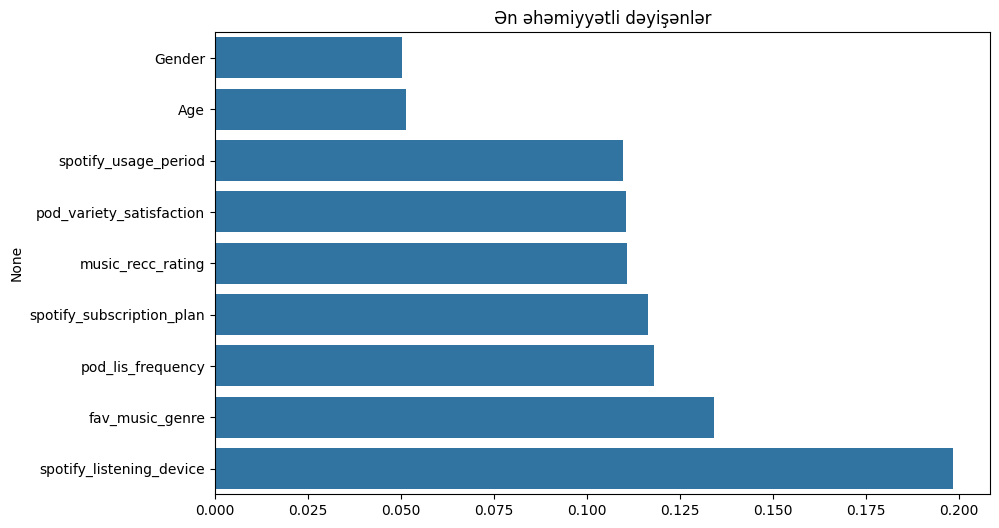

In [ ]:
# Əhəmiyyətli dəyişənləri təyin edək və zəifləri əvəz edə və ya çıxara bilərik
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
feature_names = X.columns
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=feature_names[sorted_idx])
plt.title("Ən əhəmiyyətli dəyişənlər")
plt.show()

In [ ]:
# Dəyişənləri çıxar
X_reduced = X.drop(columns=['Age', 'Gender'])


X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Proqnozlaşdır
y_pred = model.predict(X_test)

# Nəticə
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          No       0.68      0.78      0.73        63
         Yes       0.56      0.44      0.49        41

    accuracy                           0.64       104
   macro avg       0.62      0.61      0.61       104
weighted avg       0.63      0.64      0.63       104



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Model qur
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

# Proqnozlaşdır
y_pred_lr = log_reg.predict(X_test)

# Nəticə
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

          No       0.71      0.81      0.76        63
         Yes       0.62      0.49      0.55        41

    accuracy                           0.68       104
   macro avg       0.67      0.65      0.65       104
weighted avg       0.68      0.68      0.67       104



In [ ]:
import pandas as pd
import numpy as np

# Koeffisiyentləri götür
coefficients = log_reg.coef_[0]

# Xüsusiyyət adları (Age və Gender çıxarıldıqdan sonra)
feature_names = X_reduced.columns

# DataFrame yarat
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Ən yüksək müsbət və mənfi təsir edən xüsusiyyətləri göstər
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

print(coef_df)


                     Feature  Coefficient
1  spotify_subscription_plan     2.027457
6   pod_variety_satisfaction     0.310912
3            fav_music_genre     0.102491
4          music_recc_rating     0.063803
5          pod_lis_frequency     0.017035
0       spotify_usage_period    -0.036223
2   spotify_listening_device    -0.120527


                     Feature  Coefficient
1  spotify_subscription_plan     2.027457
6   pod_variety_satisfaction     0.310912
3            fav_music_genre     0.102491
4          music_recc_rating     0.063803
5          pod_lis_frequency     0.017035
0       spotify_usage_period    -0.036223
2   spotify_listening_device    -0.120527


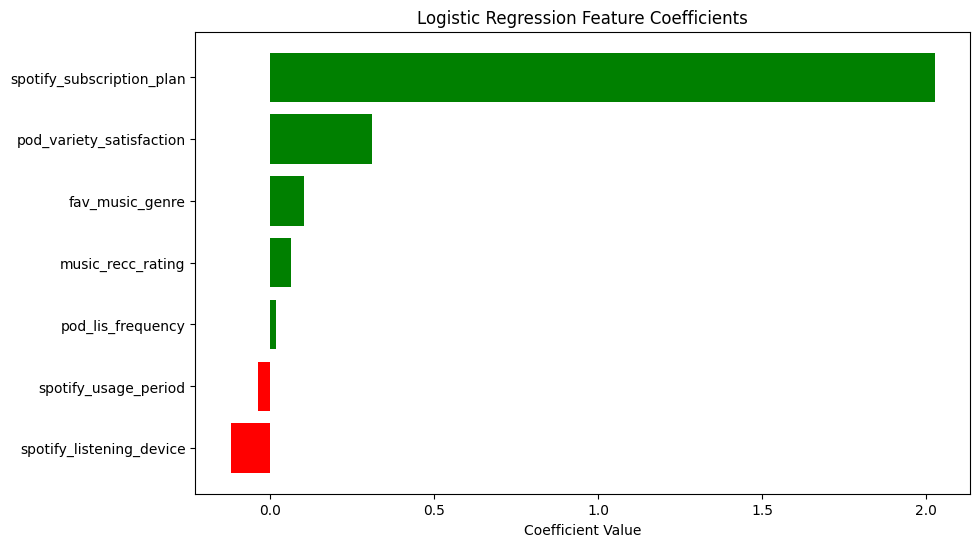

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# log_reg - Logistic Regression modeli
# X_reduced - yaş və gender çıxarıldıqdan sonra istifadə edilən DataFrame

# Koeffisiyentləri götür
coefficients = log_reg.coef_[0]

# Xüsusiyyət adları
feature_names = X_reduced.columns

# DataFrame yarat
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sıralama
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

print(coef_df)

# Vizuallaşdırma
plt.figure(figsize=(10,6))
colors = coef_df['Coefficient'].apply(lambda x: 'green' if x > 0 else 'red')
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Feature Coefficients')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
pip install shap

/usr/local/lib/python3.11/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


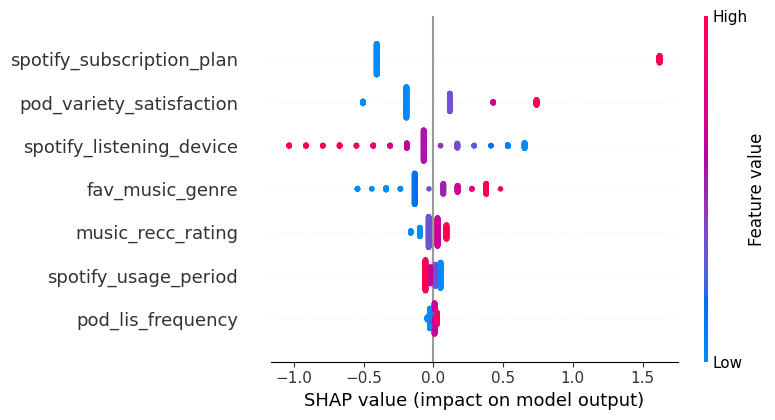

In [ ]:
# SHAP izah edicisini yaradıb və izahat alırıq
import shap

# Explainer yarat (Logistic Regression üçün LinearExplainer istifadə olunur)
explainer = shap.LinearExplainer(log_reg, X_reduced, feature_perturbation="interventional")

# SHAP dəyərlərini hesabla
shap_values = explainer.shap_values(X_reduced)

# Ümumi təsiri qrafiklə göstər
shap.summary_plot(shap_values, X_reduced)


/usr/local/lib/python3.11/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


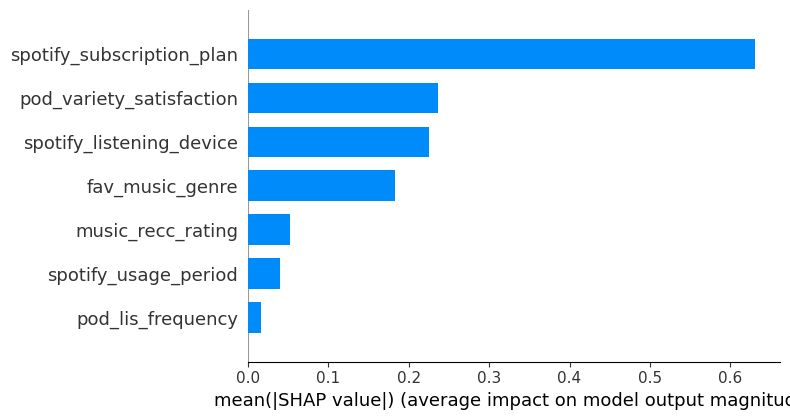

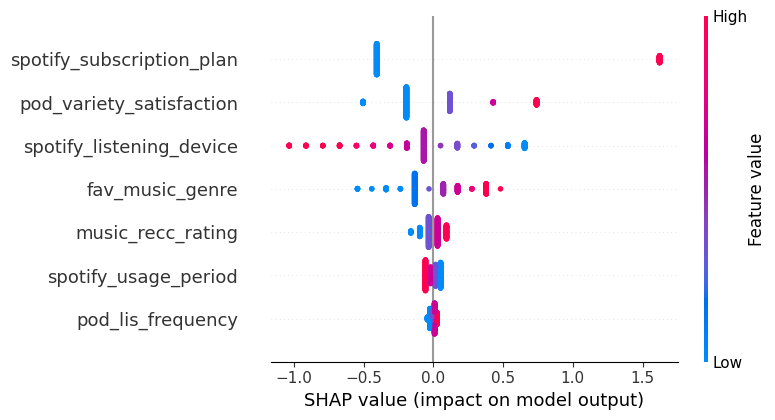

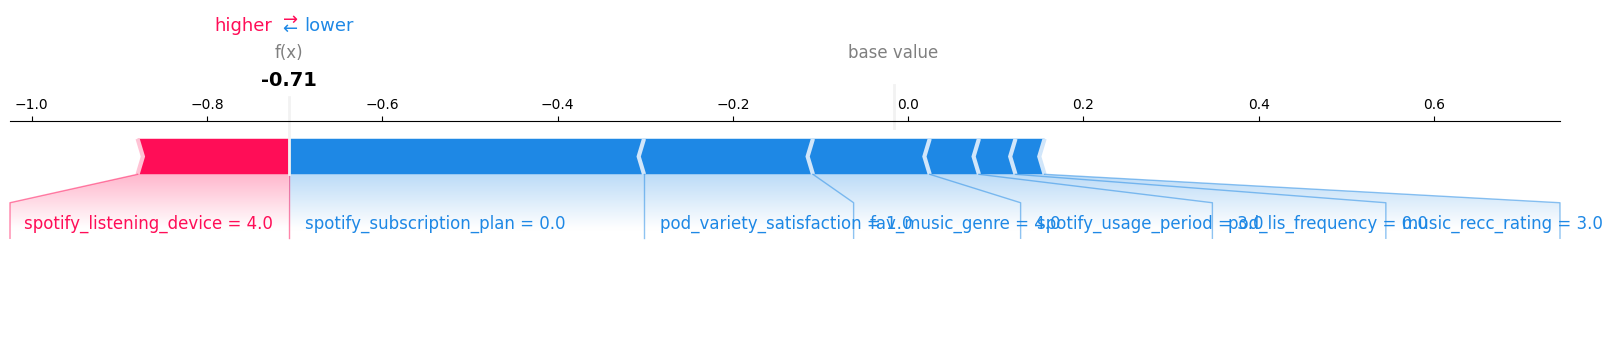

In [ ]:
import shap
import matplotlib.pyplot as plt

# SHAP Explainer yarat (LinearExplainer Logistic Regression üçün uyğundur)
explainer = shap.LinearExplainer(log_reg, X_reduced, feature_perturbation="interventional")

# SHAP dəyərlərini hesabla
shap_values = explainer.shap_values(X_reduced)

# Ümumi təsir qrafiki
shap.summary_plot(shap_values, X_reduced, plot_type="bar")

# Ətraflı təsir üçün (mavi-qırmızı nöqtələr) qrafik
shap.summary_plot(shap_values, X_reduced)

# İstəsən, nümunə səviyyəsində müəyyən istifadəçi üçün izahat al
# idx = 0 - 0-cı istifadəçi
shap.force_plot(explainer.expected_value, shap_values[0,:], X_reduced.iloc[0,:], matplotlib=True)
plt.show()


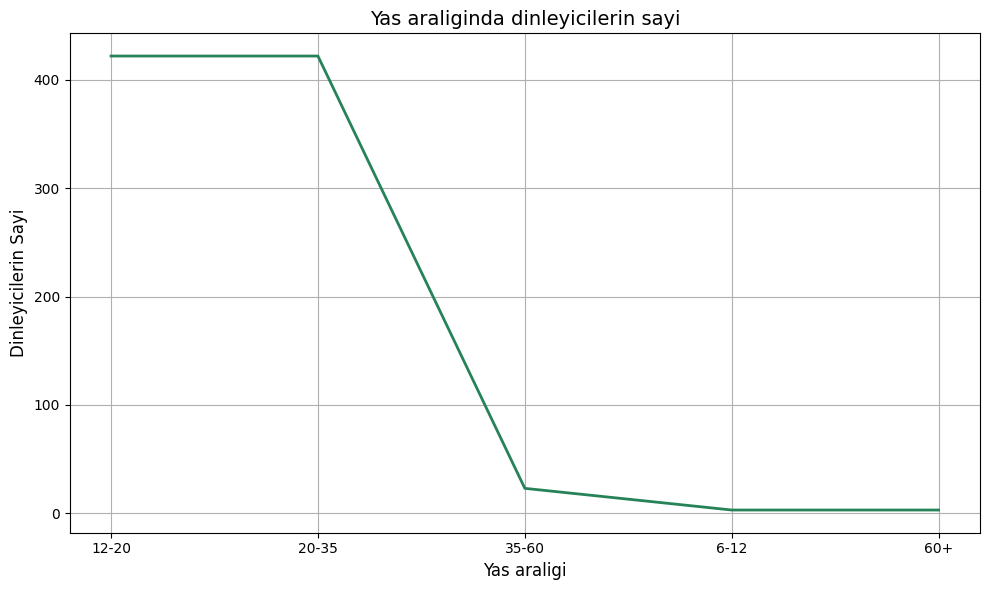

In [ ]:
# Gəlin vizual olaraq yaş ilə spotify istifadəçi aslılığına baxaq
from matplotlib.colors import LinearSegmentedColormap


annual_counts = df['Age'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10, 6))
y_patch = annual_counts.values
y_chart = y_patch.copy()
y_chart[0] = y_chart[1]
y_chart[-1] = y_chart[-2]
cmap = LinearSegmentedColormap.from_list("green_gradient", ['#268358', '#70a07f'])
ax.plot(annual_counts.index, y_chart, color='#268358', linewidth=2)
ax.set_title('Yas araliginda dinleyicilerin sayi', fontsize=14)
ax.set_xlabel('Yas araligi', fontsize=12)
ax.set_ylabel('Dinleyicilerin Sayi', fontsize=12)
ax.grid(True)
plt.tight_layout()
plt.show()

(array([391.,   0.,   0.,   0.,   0., 114.,   0.,   0.,   0.,  15.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

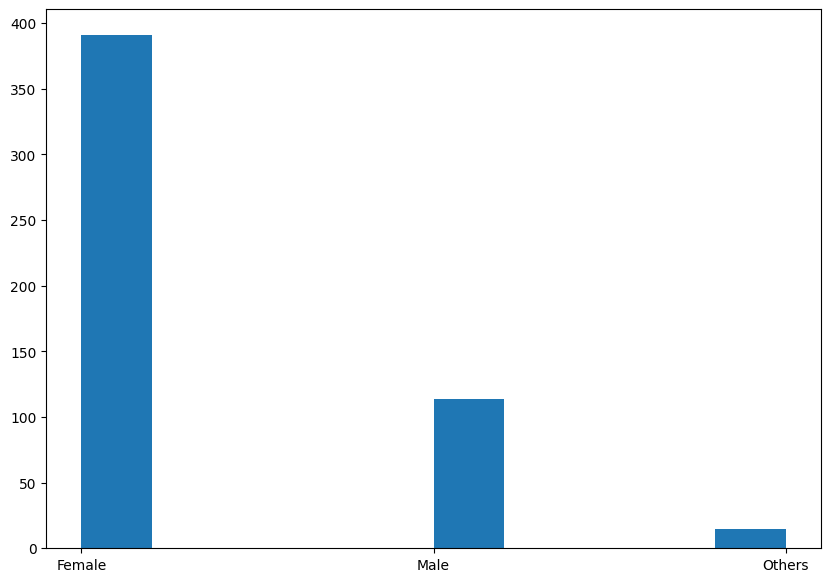

In [ ]:
# Burada gender dəyişiminə görə spotify istifadəçi davranışlarına baxaq
fig, ax1 = plt.subplots(figsize = (10, 7))
ax1.hist(df['Gender'])